# Data Science and Machine Learning in MS/HS Science



## About Jupyter Notebooks
This Jupyter Notebook is an interactive computing tool that allows for authors and users to write text, use multimedia images and videos, and create executable codeblocks in a modular, shareable environment. 

Today we'll use it to explore the examples provided during the workshop. If you're interested in continuing to explore after the workshop, here are a few recommendations: 

1. Check to see if you can install Jupyter or Visual Studio Code on your local machine, which allows you to work with Python notebooks such as this one. 
2. Check to see if you have access to Google Colab, which is a Google-fied version of Jupyter that is integrated with GSuite and Google Drive. 
3. Explore other online resources for Jupyter-like computing, such as Kaggle, Amazon Web Services "SageMaker" or Microsoft Azure. 
4. STEM@GTRI offers Jupyter computing resources for free to schools as part of our Direct to Discovery program, a remote learning program focused on connecting classrooms of STEM subjects with the resources and expertise of the Georgia Tech Research Institute. If you are interested and would like to learn more, email Tyler Kinner at tyler.kinner@gtri.gatech.edu 

## About this notebook

This notebook contains three examples of the use of data for middle and high school science across areas of data science and machine learning. Each section contains: 

1. Text descriptions of the code
2. References to the data set and additional learning about the subject
3. Executable code blocks

## Data Science in Earth Science

Run the code block below to import the required Python libraries, import the relevant data, and organize the data into a useful format. 

#### What are Python libraries? 
Python libraries are abstracted Pythoon code that have been previously written to perform functions and tasks that have wide applicability. The libraries used in this example are <i>pandas</i>, a popular library for handling data in data science and machine learning, <i>matplotlib</i>, a popular library for visualizing and graphing data, and <i>numpy</i>, another popular library for data handling and mathematics. 

#### How is the data organized? 

The data is organized into dataframes, which for our purposes can be thought of as tables in Python. The tables are organized by data type (sea surface temperature, sea surface salinity, sea surface alkalinity), as well as by month (eg., sea surface temperature for November).

#### Where is the data from? 

Data Set Link: https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0157795

Good read on the data and explanations of observable phenomena: https://science.nasa.gov/earth-science/oceanography/physical-ocean/salinity

In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [10]:
with open('./surface-alkalinity-climatology.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    reader_list = list(reader)
    nlist = reader_list[6:]
    col = reader_list[5]

# create a dataframe (table) with the values from nlist and columns from col
df = pd.DataFrame(nlist, columns=col)
# set the data type to floating point decimal so data presents and calculates as expected
df = df.astype(float)
# print(df)


In [49]:
# create a dataframe "table" of the dictionary entries with latitude less than or equal to zero
df_southern_all = df.loc[df['Latitude'] <= 0]
# create a dataframe "table" of the dictionary entires with latitude greater than zero
df_northern_all = df.loc[df['Latitude'] > 0]

##create a dataframe table of all the months and the sea surface temperature readings
df_north_sst = df_northern_all[['SST_Jan', 'SST_Feb', 'SST_Mar', 'SST_Apr',
                             'SST_May', 'SST_Jun', 'SST_Jul', 'SST_Aug', 'SST_Sep', 'SST_Oct',
                             'SST_Nov', 'SST_Dec']]

##create a dataframe table of all the months and the sea surface salinity readings
df_north_sss = df_northern_all[['SSS_Jan', 'SSS_Feb', 'SSS_Mar', 'SSS_Apr',
                             'SSS_May', 'SSS_Jun', 'SSS_Jul', 'SSS_Aug', 'SSS_Sep', 'SSS_Oct',
                             'SSS_Nov', 'SSS_Dec']]

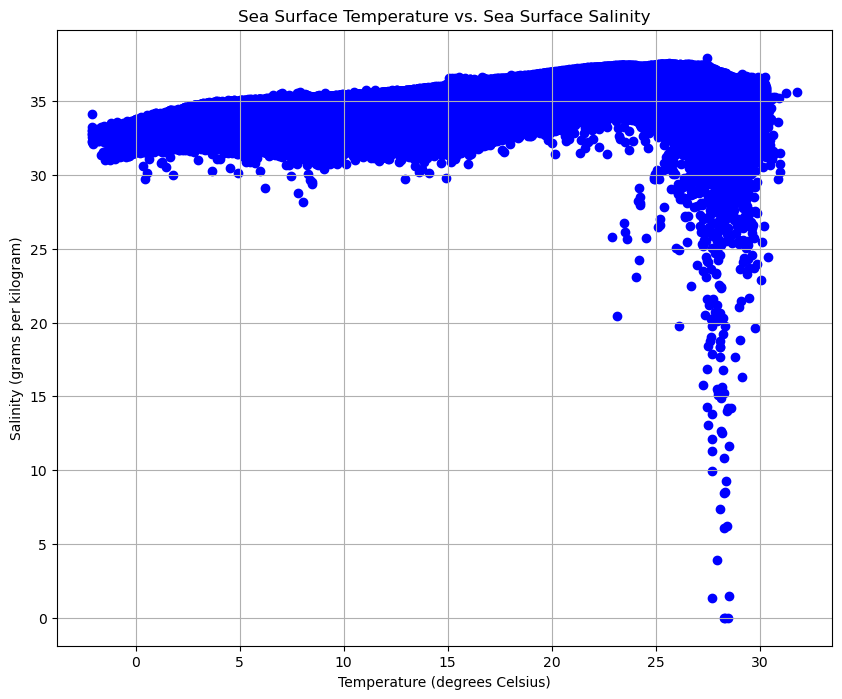

In [47]:
plt.figure(figsize=(10, 8), dpi=100) ##initialize a plot with size of with a size ratio of 10:8 and 100 dots per inch (resolution)

##create a scatter plot, with x-axis of sea surface temperature in month (sst), y-axis of sea surface salinity in month (sss), in the color blue
plt.scatter(df_north_sst,
            df_north_sss, color="blue") 

plt.title('Sea Surface Temperature vs. Sea Surface Salinity') ##title of the plot
plt.xlabel('Temperature (degrees Celsius)') ##x-axis label
plt.ylabel('Salinity (grams per kilogram)') ##y-axis label
plt.grid(True, which='both') ##show or hide grid

plt.show() ##display the plot